In [1]:
from src.eda_vector import *
from src.lda_model import *
from src.model import *
from src.classifier import *
from src.helpers import *
from imblearn.over_sampling import SMOTE
import pandas as pd

### Load data

In [2]:
# load data, train, test, split
X_train, X_test, y_train, y_test = get_data_wrapper(sample=False, samp_size=0.01)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [49]:
# misclassifications
false_pos = pd.read_csv('false_positives_tfidf.csv')
false_neg = pd.read_csv('false_negative_tfidf.csv')
X = all_misses['text']
y = all_misses['actual']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [47]:
len(X_test) + len(X_train)

5371984

In [52]:
sum(y_train) + sum(y_test) / 

379680

In [53]:
379680 / 5371984

0.07067779799790916

### Vectorize and balance

In [3]:
# vectorizing process
custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
                'trump', 'clinton', 'donald', 'donald trump', 'donaldtrump', 'says', 'hillary', 'hillaryclinton',
                'hillary clinton', 'realdonaldtrump', 'would', 'let', 'video', 'like']

# custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
#                 'says', 'would', 'let', 'video', 'like']

# fit vectorizer, add stop words, return vocab
vectors = EDA_vec(X_train, y_train)
vectors.add_stop_words(custom_stops)
vocab, fit_mat = vectors.vectorize(vec_type='tfidf', min_df=0.0001)

# transform training and testing data 
matrix = fit_mat.transform(X_train)
matrix_test = fit_mat.transform(X_test)

In [44]:
vectors.word_freq()
vectors.chart_word_freq(low_words=0, high_words=5)

MemoryError: Unable to allocate 423. GiB for an array with shape (4028988, 14101) and data type float64

### Random forest classifier

In [6]:
# balance count vectorized data for training
bal_matrix, bal_y_train = SMOTE().fit_resample(matrix, y_train) 

Random Forest Scores -- w/out LDA
accuracy = 0.8300754432626753
oob = 0.8696743360714144
recall = 0.8024336283185841
precision = 0.26667063461498064
f_one = 0.40030798177336535


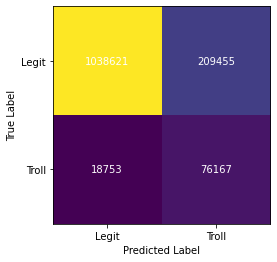

In [7]:
# random forest (without LDA) -- balanced fit, unbalanced predict
forest = RandForest(n_estimators=150, max_depth=150, max_leaf=None, 
                    max_features='log2', class_weight='balanced')
forest.fit(bal_matrix, bal_y_train)
probas, y_hat = forest.predict(matrix_test, thresh=0.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

Random Forest Scores -- w/out LDA
accuracy = 0.5184252224131718
oob = 0.8696743360714144
recall = 0.9717973029919933
precision = 0.12527586548764869
f_one = 0.22194098207615376


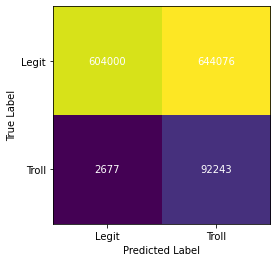

In [8]:
probas, y_hat = forest.predict(matrix_test, thresh=0.25)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [67]:
get_percent(92243, 644076, 2677, 604000)

true neg: 0.4839448879715658
false pos: 0.5160551120284341
false neg: 0.028202697008006743
true pos: 0.9717973029919933


Random Forest Scores -- w/out LDA
accuracy = 0.950725839838689
oob = 0.8696743360714144
recall = 0.3208280657395702
precision = 0.9468921986256646
f_one = 0.4792691275643094


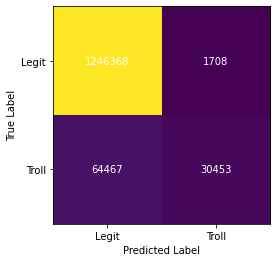

In [9]:
probas, y_hat = forest.predict(matrix_test, thresh=0.75)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [66]:
get_percent(30453, 1708, 64467, 1246368)

true neg: 0.9986314935949413
false pos: 0.0013685064050586663
false neg: 0.6791719342604299
true pos: 0.3208280657395702


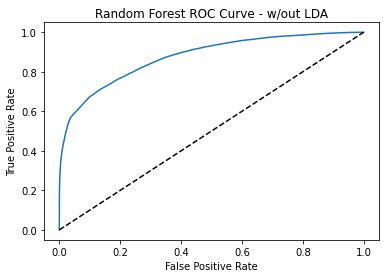

In [10]:
thresh_nolda = plot_roc_curve(matrix_test, y_test, lda=False) # wihtout LDA

In [11]:
roc_frame = pd.DataFrame({'fpr': thresh_nolda[0], 'tpr': thresh_nolda[1], 'thresh': thresh_nolda[2]})

In [83]:
roc_frame[(roc_frame['tpr'] >= 0.77) & (roc_frame['tpr'] < 0.78)]

,fpr,tpr,thresh
49425,0.203150,0.770010,0.523845
49426,0.203151,0.770010,0.523845
49427,0.203151,0.770024,0.523845
49428,0.203154,0.770024,0.523844
49429,0.203168,0.770024,0.523844
...,...,...,...
52631,0.216506,0.779983,0.520371
52632,0.216508,0.779983,0.520368
52633,0.216508,0.779997,0.520367
52634,0.216511,0.779997,0.520366


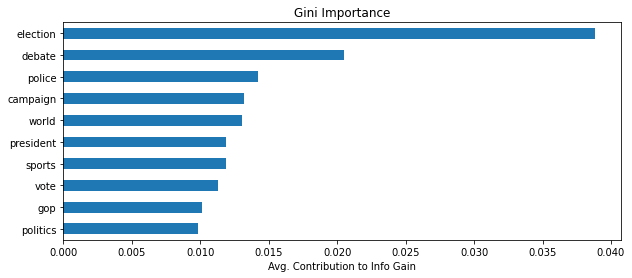

In [13]:
forest.chart_gini_import(features=10, vocab=vocab)

In [14]:
def get_misses(y_hat, y_test, X_test):
    df = pd.DataFrame({'text': X_test, 'predicted': y_hat, 'actual': y_test})
    df = df[df['predicted'] != df['actual']]
    false_pos = df[df['predicted'] == 1]
    false_neg = df[df['predicted'] == 0]
    return false_pos, false_neg

In [15]:
false_pos_tfidf, false_neg_tfidf = get_misses(y_hat, y_test, X_test)
false_pos_tfidf.to_csv('false_positives_tfidf.csv')
false_neg_tfidf.to_csv('false_negative_tfidf.csv')


Random Forest Scores -- w/out LDA
accuracy = 0.8380047297236924
oob = 0.8696743360714144
recall = 0.791740412979351
precision = 0.27533953975738523
f_one = 0.40858689240287827


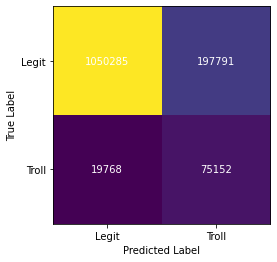

In [29]:
probas, y_hat = forest.predict(matrix_test, thresh=0.55)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [68]:
get_percent(75152, 197791, 19768, 1050285)

true neg: 0.8415232726212186
false pos: 0.1584767273787814
false neg: 0.20825958702064898
true pos: 0.791740412979351


Random Forest Scores -- w/out LDA
accuracy = 0.8593689035559302
oob = 0.8696743360714144
recall = 0.7609671302149178
precision = 0.30297094488882553
f_one = 0.43339163409124326


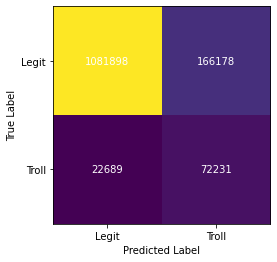

In [42]:
probas, y_hat = forest.predict(matrix_test, thresh=0.57)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [69]:
get_percent(72231, 166178, 22689, 1081898)

true neg: 0.8668526596136774
false pos: 0.13314734038632262
false neg: 0.23903286978508217
true pos: 0.7609671302149178


Random Forest Scores -- w/out LDA
accuracy = 0.8697174079446253
oob = 0.8696743360714144
recall = 0.7459755583649389
precision = 0.31943698824803196
f_one = 0.44732378350206103


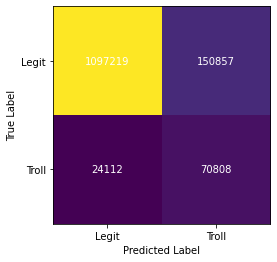

In [90]:
probas, y_hat = forest.predict(matrix_test, thresh=0.5779)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [77]:
get_percent(71174, 154352, 23765, 1093724)

true neg: 0.876328044125518
false pos: 0.123671955874482
false neg: 0.25031862564383445
true pos: 0.7496813743561656


Random Forest Scores -- w/out LDA
accuracy = 0.8719996187628258
oob = 0.8696743360714144
recall = 0.7427728613569321
precision = 0.3234247128334985
f_one = 0.45063148744695


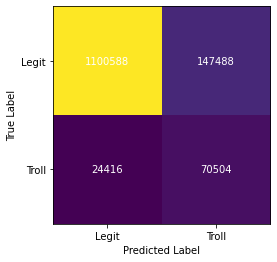

In [114]:
probas, y_hat = forest.predict(matrix_test, thresh=0.5795)
forest.score(y_test, y_hat)
print('Random Forest Scores -- w/out LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

In [103]:
get_percent(70504, 147488, 24416, 1100588)

true neg: 0.8818277092100161
false pos: 0.11817229078998394
false neg: 0.25722713864306784
true pos: 0.7427728613569321


### LDA model

In [57]:
# # fit LDA model on training data
lda = LDA_model(topics=5)
lda.fit(matrix, y_train, vocab)
lda.phi() # to evaluate coherence score
theta = lda.theta()

# get test theta for random forest evaluation
theta_test = lda.test_theta(matrix_test)

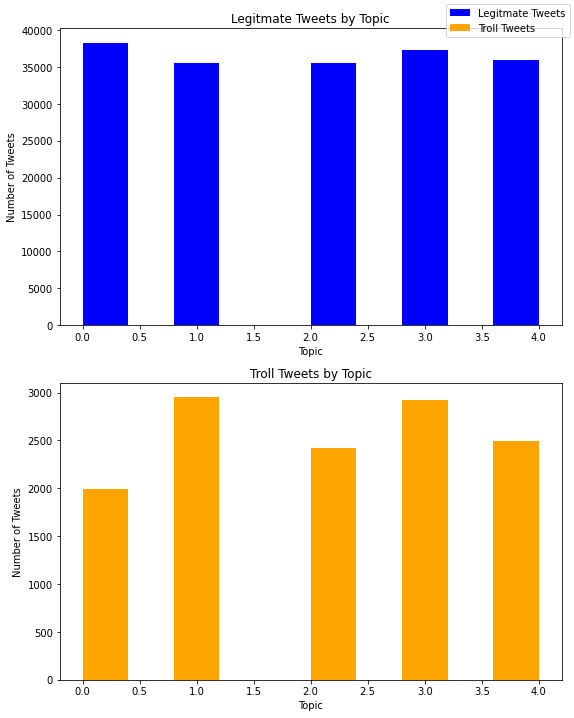

In [58]:
# get topic liklihoods by class
lda.topic_likelihood()
lda.plot_topics_by_class()

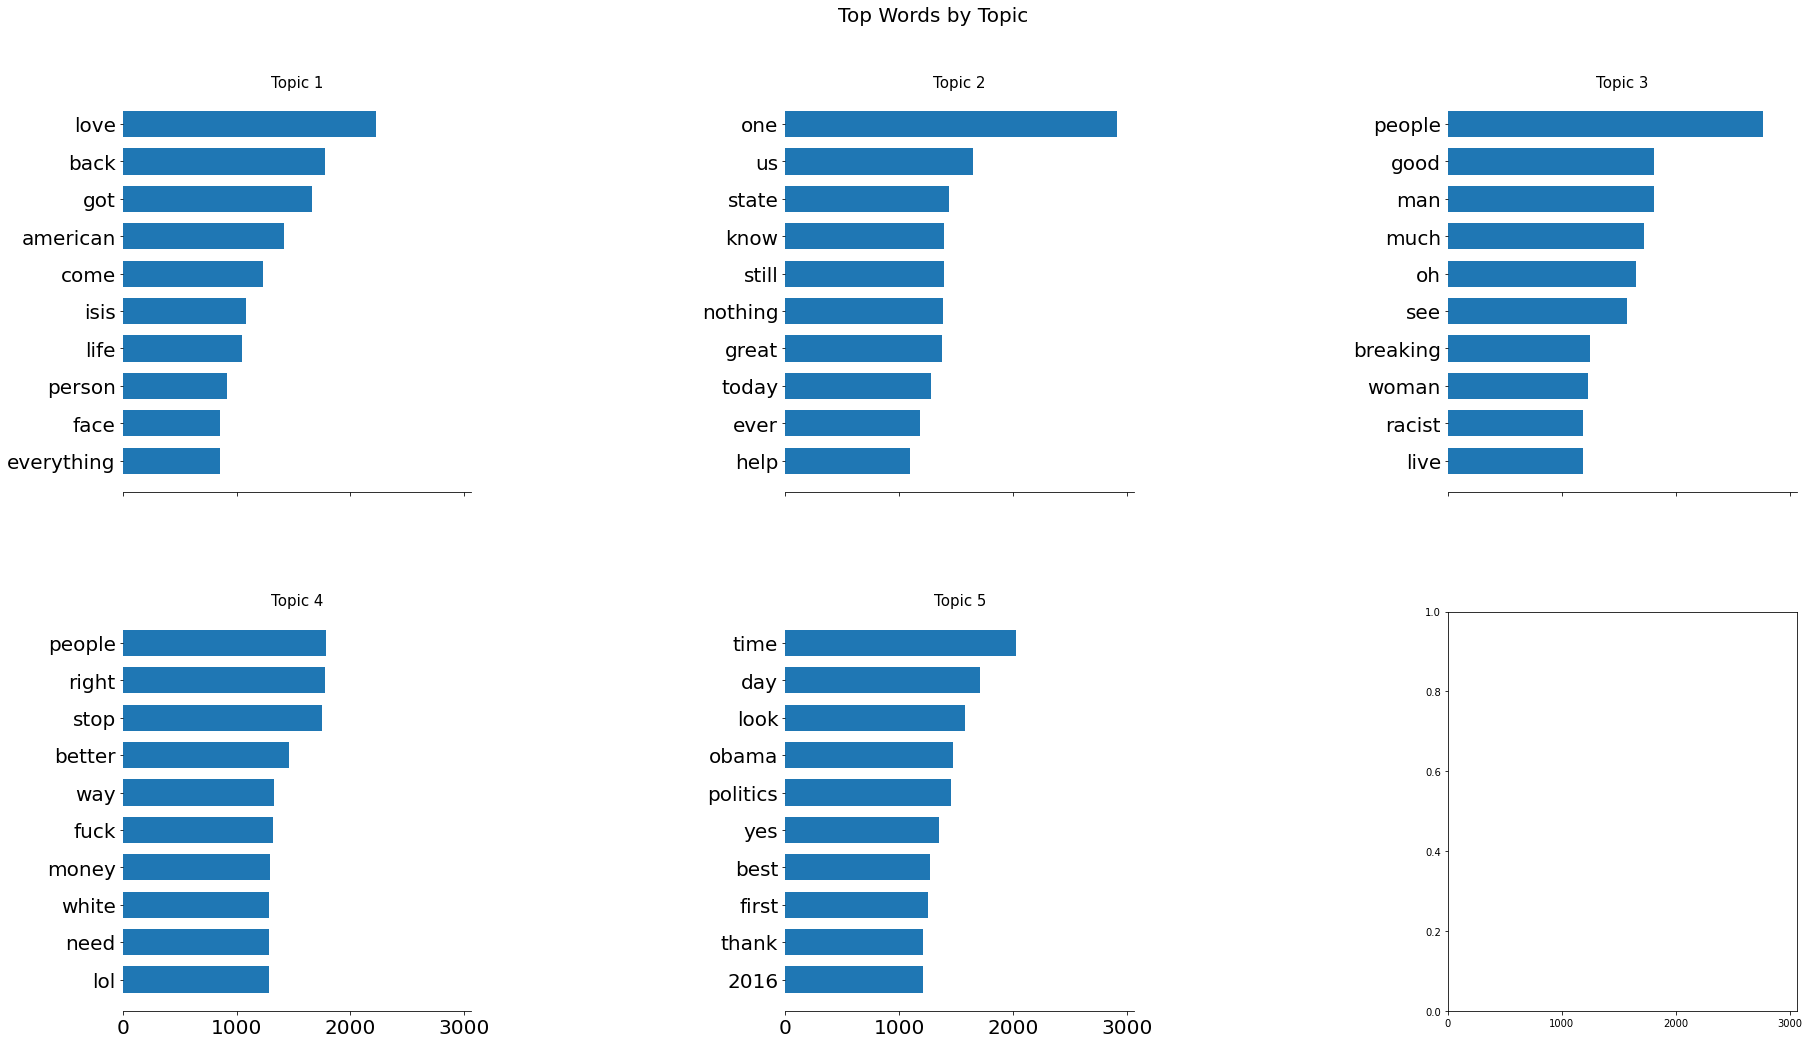

In [59]:
lda.plot_top_words()

In [60]:
lda.coherance_score()

-6.14626798596483

In [61]:
# balance count vectorized data for training
bal_theta, bal_y_train = SMOTE().fit_resample(theta, y_train) 

Random Forest Scores -- with LDA
accuracy = 0.8920837933995829
oob = 0.919184046294625
recall = 0.2957481794691097
precision = 0.23763684409211022
f_one = 0.263526949241235


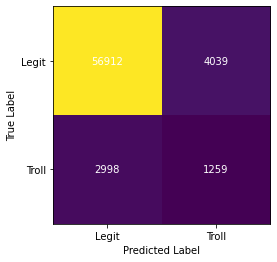

In [62]:
# random forest (with LDA)
forest = RandForest(n_estimators=150, max_depth=150, max_leaf=None, 
                    max_features=theta.shape[1], class_weight=None)
forest.fit(bal_theta, bal_y_train)
probas, y_hat = forest.predict(theta_test, thresh=.542)
forest.score(y_test, y_hat)
print('Random Forest Scores -- with LDA')
print(f'accuracy = {forest.acc}')
print(f'oob = {forest.oob}')
print(f'recall = {forest.recall}')
print(f'precision = {forest.precision}')
print(f'f_one = {forest.f_one}')
forest.plot_confusion()

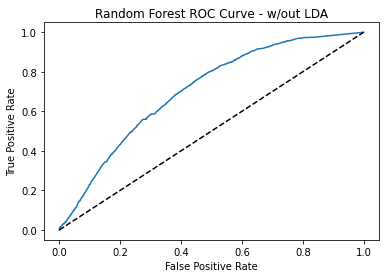

In [63]:
thresh_lda = plot_roc_curve(theta_test, y_test, lda=False) # wihtout LDA

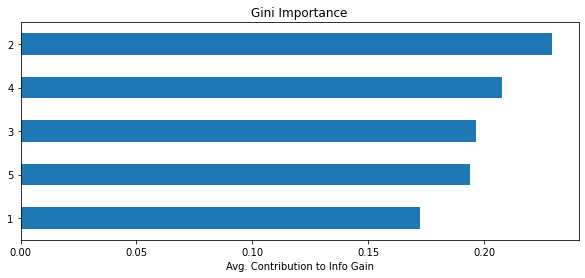

In [64]:
forest.chart_gini_import(features=-1)

### Misclassifications

In [104]:
false_pos = pd.read_csv('false_positives_tfidf.csv')
false_neg = pd.read_csv('false_negative_tfidf.csv')

In [115]:
all_misses = pd.concat([false_pos, false_neg])

In [11]:
X = all_misses['text']
y = all_misses['actual']

In [12]:
from sklearn.model_selection import train_test_split

In [ ]:
# balance count vectorized data for training
bal_matrix, bal_y_train = SMOTE().fit_resample(matrix, y_train) 

In [13]:
# vectorizing process
custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
                'trump', 'clinton', 'donald', 'donald trump', 'donaldtrump', 'says', 'hillary', 'hillaryclinton',
                'hillary clinton', 'realdonaldtrump', 'would', 'let', 'video', 'like']

# custom_stops = ['https', 'rt', 'co', 'amp', 'via', 'go', 'get', 'said', 'say', 'news', 'new', 'make', 'want', 
#                 'says', 'would', 'let', 'video', 'like']

# fit vectorizer, add stop words, return vocab
vectors = EDA_vec(X, y)
vectors.add_stop_words(custom_stops)
vocab, fit_mat = vectors.vectorize(min_df=0.0001)

# transform training and testing data 
matrix = fit_mat.transform(X)
mat

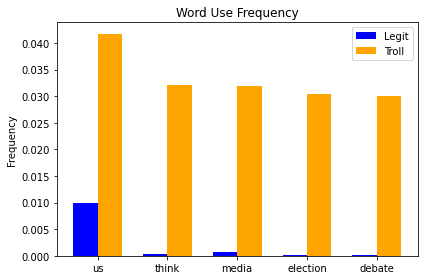

In [16]:
vectors.word_freq()

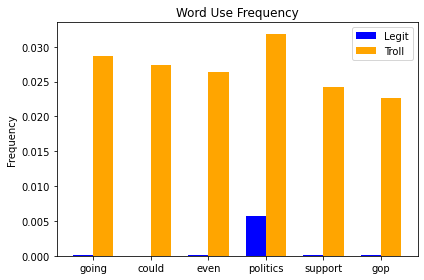

In [17]:
vectors.chart_word_freq(low_words=12, high_words=18)

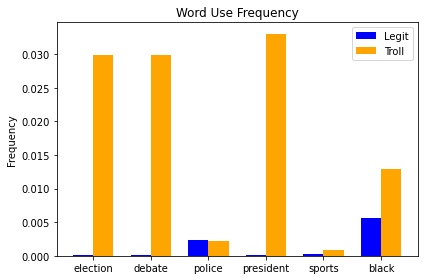

In [102]:
word_lst = ['election', 'debate', 'police', 'president', 'sports', 'black']
vectors.chart_word_freq(word_lst)

/home/ubuntu/topic_modeling_2016/src/eda_vector.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(legit_words)
/home/ubuntu/topic_modeling_2016/src/eda_vector.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(troll_words)


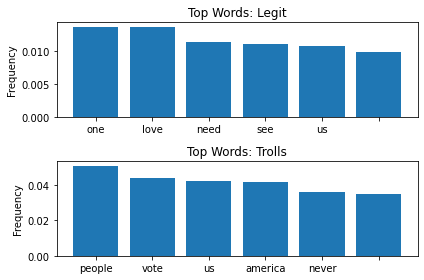

In [19]:
vectors.chart_top_words()

In [29]:
all_misses['actual'].value_counts()

0    243780
1     17049
Name: actual, dtype: int64

In [43]:
np.array(y)

array([0, 0, 0, ..., 1, 1, 1])

In [101]:
for text in X[41:50]:
    print(text) 

eric trump is a fuckboy
RT @Lee_in_Iowa: Now that Trump's let 'em loose, these GOPers aren't bothering with dog whistles any more. They're right up front w/ the ra…
@HillaryClinton all of the above!
@WhatTheFFacts this is very true for Hillary Clinton
Kareem Abdul-Jabbar Introduced Himself as Michael Jordan, Burned Donald Trump https://t.co/5TyPd1I7Nw
https://t.co/3SoCdoW1kh
She belongs in prison. #HillaryForPrison #TrumpPence16 #HillaryForPrison #TrumpPence16 https://t.co/JtWrXkygH6
RT @IAFFTreg: .@IAFFLocal5 responds to @realDonaldTrump attack over the weekend. @LauraWalkerKC @JakeSherman @TheFix https://t.co/DIU8kYDItp
RT @zerohedge: The Complete A To Z Of Nations Destroyed By Hillary Clinton's "Hubris" https://t.co/aXDESXQOM8
Because she is part of the problem. https://t.co/6ZLSRGx3rc


In [135]:
for text in false_pos['text']:
    if 'police' in text:
        print(text)
#     if 'sports' in text:
#         print(text)

@realDonaldTrump @Amberis4LSU Just remember, by population, there is a disproportionate number of police killed by Blacks than the reverse.
Police are investigating after a woman told police a man in a Donald Trump mask stabbed her https://t.co/ShsZNpQ3yw
Trump 'very troubled' by Tulsa police shooting; Clinton calls killings 'unbearable' https://t.co/x54ZNdjZIz #temecula
#SHUTDOWNCITYHALLNYC  love the irony of a protest for the abolishment of police, is again policing it self. https://t.co/XpjhnJgWZ2
@michael_pullock Seeing a bunch of Trump protesters flip police cars and engage in violent acts doesn't energize
@realDonaldTrump Hit em hard! The thought police are out trying to make people afraid to speak up.
RT @Inductivist: Simplest explanation for high rate of #black shootings is more frequent, antagonist encounters with #police. #MAGA #Trump…
Vandal spray paints’ I’m drunk “on the side of the police station – Mural bikini-clad… https://t.co/wW5wcXH3uL https://t.co/3F9mUlGFgu
Donkey 

In [129]:
for text in false_neg['text']:
    if 'Benghazi' in text:
        print(text)

Newt says Hillary handled the recent terrorist attacks just like she did Benghazi. Blaming the entire thing on Trump.   #FtMyers #Chelsea
Pity Sick Hillary didn't give our Patriots in #Benghazi the kind of assistance she got on 9/11. #NeverHillary https://t.co/oCZRFnW62m
Targets: Personal Server, Clinton Fdn, ISIS/Benghazi/Mideast Fail, Russian Reset, War On Energy/Guns/Cops, ACA, Debt, Unvetted Muslims #tcot https://t.co/6V8MkK16fY
Benghazi survivor John Tiegen warns all Americans  Join the march in NYC  https://t.co/1qGFc9szqb https://t.co/44ST4bwdvi
Check out 'Whistleblower: Hillary Could Have Saved #Benghazi Lives' on Tea Party Command https://t.co/AxbrR57vKC  https://t.co/5Lz2fLbujT
If only Hillary was as good at preventing tragedy as she is at exploiting it! Disgusting!!! #Benghazi https://t.co/AYnuVcVLLB
'@MiceeMouse @realDonaldTrump Trump should put families of Benghazi victims front and center or Bill's flavors of the week☺️��'
Clinton staffer slams Benghazi committee leaks as

In [65]:
def get_percent(tp, fp, fn, tn):
    legit_true = tn
    legit_missed = fp
    troll_missed = fn
    troll_true = tp
    
    troll = troll_true + troll_missed
    legit = legit_true + legit_missed
    
    true_neg = legit_true / legit
    false_pos = legit_missed / legit
    false_negative = troll_missed / troll
    true_positive = troll_true / troll
    
    print(f'true neg: {true_neg}')
    print(f'false pos: {false_pos}')
    print(f'false neg: {false_negative}')
    print(f'true pos: {true_positive}')

In [113]:
get_percent(92579, 640447, 2341, 607629)

true neg: 0.4868525634656864
false pos: 0.5131474365343136
false neg: 0.024662873999157186
true pos: 0.9753371260008428


In [114]:
get_percent(22605, 673, 72315, 1247403)

true neg: 0.9994607700172105
false pos: 0.0005392299827895096
false neg: 0.7618520859671302
true pos: 0.23814791403286978


In [116]:
get_percent(77871, 243780, 17049, 1004296)

true neg: 0.8046753563084299
false pos: 0.19532464369157007
false neg: 0.17961441213653603
true pos: 0.8203855878634639


In [106]:
a = ['fizzbuzz', 'figbug']

for word in a:
    if 'buzz' in word:
        print(word)

fizzbuzz


In [116]:
all_misses.head()

,Unnamed: 0,text,predicted,actual
0,3313529,"@realDonaldTrump @Amberis4LSU Just remember, b...",1,0
1,729313,Hillary Clinton MEDICAL RECORDS Leaked! 'Demen...,1,0
2,3563776,Trump suggests #blacklivesmatter protesters ar...,1,0
3,888014,@imraansiddiqi . Yusra Mardini is a befitting ...,1,0
4,2776823,GLOBALISM. PERIOD.\n\n United Nations' officia...,1,0


In [117]:
forest.probas[:10]

array([[0.88917066, 0.11082934],
       [0.81694681, 0.18305319],
       [0.92974212, 0.07025788],
       [0.40218618, 0.59781382],
       [0.67575509, 0.32424491],
       [0.73776735, 0.26223265],
       [0.91459632, 0.08540368],
       [0.30292736, 0.69707264],
       [0.55290637, 0.44709363],
       [0.94895959, 0.05104041]])

In [118]:
len(false_pos)

1708

In [119]:
len(false_neg)

64467